In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Pitaya.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2501 non-null   object 
 1   precio_venta    2476 non-null   float64
 2   peso            2501 non-null   float64
 3   t_id            2501 non-null   object 
 4   fecha_venta     2493 non-null   object 
 5   hora_venta      2493 non-null   object 
 6   tipo            2501 non-null   object 
 7   fecha_recogida  2501 non-null   object 
 8   hora_recogida   2501 non-null   object 
 9   lote            2501 non-null   object 
 10  marca           2501 non-null   object 
 11  coste_inicial   2420 non-null   float64
 12  proveedor       2501 non-null   object 
dtypes: float64(3), object(10)
memory usage: 254.1+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2476.000000  2501.000000    2420.000000
mean       3.517987   299.561574       1.998552
std        0.692217   100.069453       0.488392
min        1.189876  -101.598110       0.149162
25%        3.043413   232.908719       1.669187
50%        3.508317   299.388345       2.004017
75%        3.990606   367.207759       2.329050
max        5.976981   627.536890       3.648143


In [ ]:
print(df.head())

         cliente  precio_venta        peso              t_id fecha_venta  \
0  CompraMaestra      3.516439  208.048250  Pitaya001071.png  2022/10/01   
1  CompraMaestra      3.383520  340.100122  Pitaya001149.png  2022/09/02   
2  CompraMaestra      2.965592  242.433483  Pitaya001406.png  2022/09/12   
3  CompraMaestra      4.144249  242.886915  Pitaya001544.png  2022/09/07   
4  CompraMaestra      5.480157  387.694446  Pitaya001569.png  2022/09/16   

  hora_venta    tipo fecha_recogida hora_recogida                      lote  \
0      04:00  Pitaya     2022/09/30         19:00  V73D65I65L48M48S49J80T71   
1      17:00  Pitaya     2022/09/02         17:00  V73D65I65L48M49P57J80T71   
2      13:00  Pitaya     2022/09/12         08:00  V73D65I65L48M52L54J80T71   
3      17:00  Pitaya     2022/09/07         09:00  V73D65I65L48M53P52J80T71   
4      01:00  Pitaya     2022/09/15         21:00  V73D65I65L48M53R57J80T71   

              marca  coste_inicial                     proveedor  
0

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -101.59811027463849
Peso máximo: 627.5368901724396
Total negativos: 5
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
RincónFrutas,1
ExóticoManjar,1
PaladarDorado,1
ExquisitoJardín,1
AventuraFrutal,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Cosechadoras Progresivas SA,1
Reforestación Ecológica VerdeVida,1
Maquinaria Agrícola Avanzada,1
AgroSuministros del Campo,1
Fertilizantes Naturales del Valle,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['V73D65I65L48M56T56J80T71', 'V73D65I65L48N50L46V78M',
       'V73D65I65L48P56T46V78M', 'V73D65I65L48N50L57J80T71',
       'V73D65I65L48M52O55J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes V73D65I65L.

In [ ]:
print(negativos["peso"])

900    -101.598110
990     -30.276502
1253    -64.229193
1378    -12.123016
2040     -7.637721
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                    cliente  precio_venta        peso              t_id  \
900         La Gran Cosecha      3.212476 -101.598110  Pitaya001888.png   
990     SuperAhorro Express      3.434207  -30.276502   Pitaya00220.png   
1253  El Bazar de la Comida      3.627987  -64.229193   Pitaya00488.png   
1378       Comercial Fresco      4.460479  -12.123016  Pitaya002209.png   
2040          MaxiAlimentos      3.293834   -7.637721  Pitaya001437.png   

     fecha_venta hora_venta    tipo fecha_recogida hora_recogida  \
900   2022/09/29      00:00  Pitaya     2022/09/28         15:00   
990   2022/09/07      13:00  Pitaya     2022/09/07         08:00   
1253  2022/09/16      18:00  Pitaya     2022/09/16         13:00   
1378  2022/09/28      00:00  Pitaya     2022/09/27         18:00   
2040  2022/09/26      10:00  Pitaya     2022/09/26         03:00   

                          lote            marca  coste_inicial  \
900   V73D65I65L48M56T56J80T71     RincónFrutas       2.172465   
990     

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 450 g:", len(df[df['peso'] > 450]))
print("Peso máximo:", df.loc[df['peso'] > 450, 'peso'].max())

Cantidad de pesos mayores de 450 g: 155
Peso máximo: 627.5368901724396


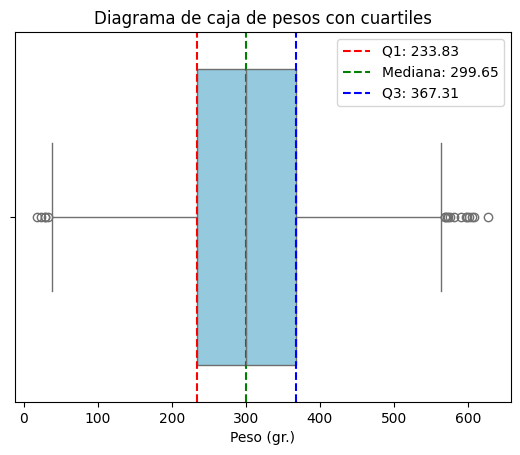

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

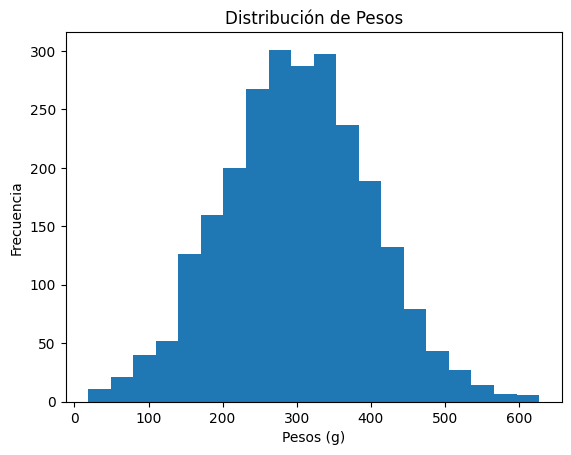

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 13
233.83248092333602
367.3129382765077
133.48045735317166


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso              t_id
1826   18.538946  Pitaya001987.png
1552   23.198957  Pitaya002400.png
2363   28.946803   Pitaya00912.png
56     29.122623   Pitaya00785.png
992    33.047910  Pitaya002265.png
...          ...               ...
1278  598.432715  Pitaya001190.png
2369  601.582507   Pitaya00102.png
1955  605.136541  Pitaya001435.png
421   608.757828   Pitaya00613.png
2414  627.536890  Pitaya002474.png

[2496 rows x 2 columns]


El peso medio de una pitaya ronda entre los 200 y los 600 gr.

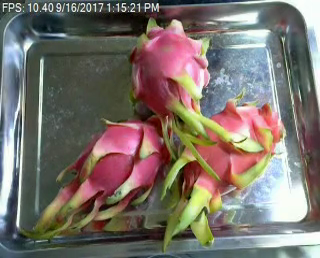

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Pitaya/Pitaya00785.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

El peso de tres Pitayas es de 29.122623 gr. lo que no cuadraria para nada con el peso de una sola pitaya.

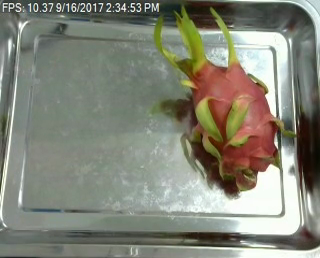

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Pitaya/Pitaya00613.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

El peso de una pitaya en cambio es de 608.757828 por lo que podemos decir que o bien es una pitaya muy grande y pesada o tampoco encajaria con el peso.

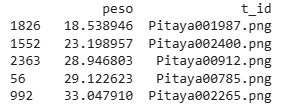

El peso es inconsistente en la siguiente tabla ya que una sola pitaya no podria pesar tan poco peso y en la mayoria de las imagenes hay más de una unidad.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.1491622971343427
Coste inicial máximo: 3.648142583935044
Coste inicial negativos: 0
Coste inicial nulos: 81


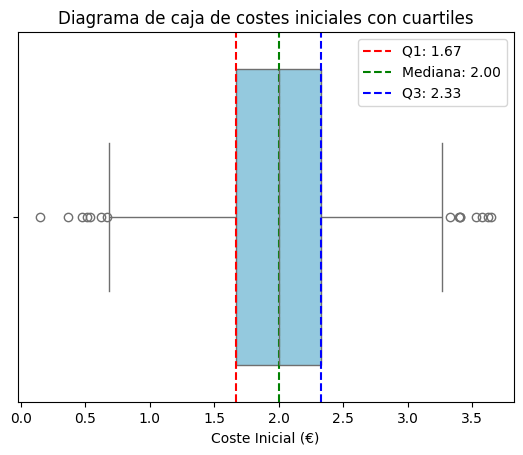

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven algunos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

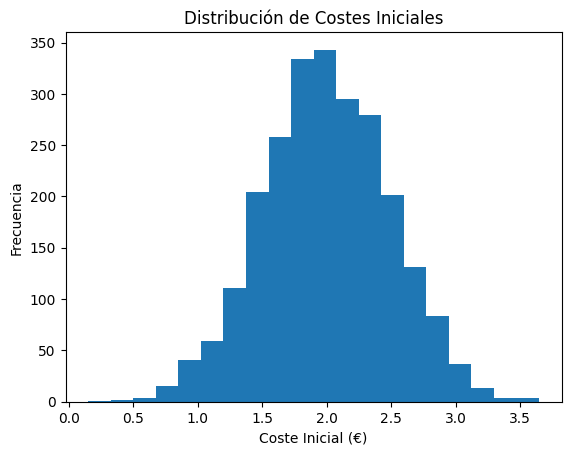

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 8
1.6691871522940032
2.3290502301552474
0.6598630778612442


Una vez analizados los costes iniciales y viendo que tenemos 8 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.189875609145403
Precio venta máximo: 5.976981350105193
Total negativos: 0
Total nulos: 25


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 25 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

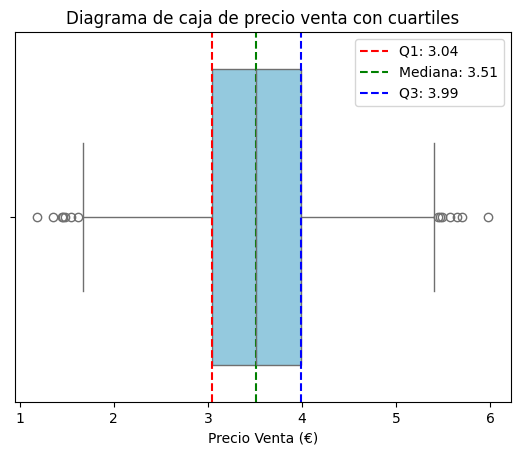

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

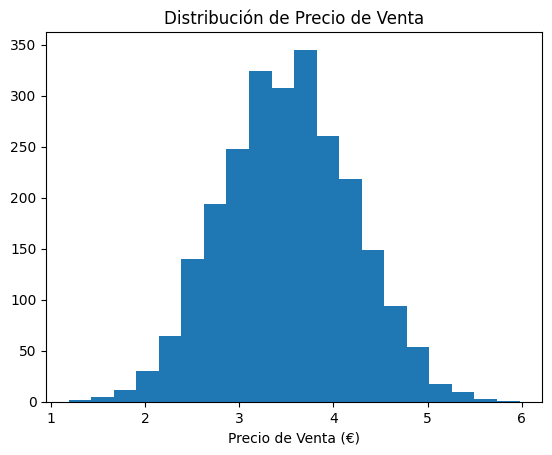

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)


Total outliers: 7
3.0434132800105065
3.9906062872084114


En precio venta tenemos 7 outliers mientras que en coste inicial teníamos 8.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,CompraMaestra,5.480157,387.694446,Pitaya001569.png,2022/09/16,01:00,Pitaya,2022/09/15,21:00,V73D65I65L48M53R57J80T71,...,387.694446,2022/09/16,01:00,Pitaya,2022/09/15,21:00,V73D65I65L48M53R57J80T71,PlacerFrutado,3.405188,AgroEnvases Sostenibles
1,MaxiDescuentos,5.699116,296.354014,Pitaya002295.png,2022/09/06,12:00,Pitaya,2022/09/06,07:00,V73D65I65L48N50U53J80T71,...,296.354014,2022/09/06,12:00,Pitaya,2022/09/06,07:00,V73D65I65L48N50U53J80T71,JugosoAroma,3.532355,Cosechadoras Progresivas SA


2 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-29 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
311,-29 days
1501,-28 days
1035,-23 days
2116,-23 days
1828,-20 days
...,...
807,NaT
1217,NaT
1606,NaT
1886,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de Pitaya a un proveedor en un solo día.

**En el caso de las Pitayas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las pitayas no encontramos más de un tipo de fruta ni más de una marca.
**Con las Pitayas Esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.681436,-0.611835
precio_venta,0.681436,1.000000,0.054260
rentabilidad,-0.611835,0.054260,1.000000


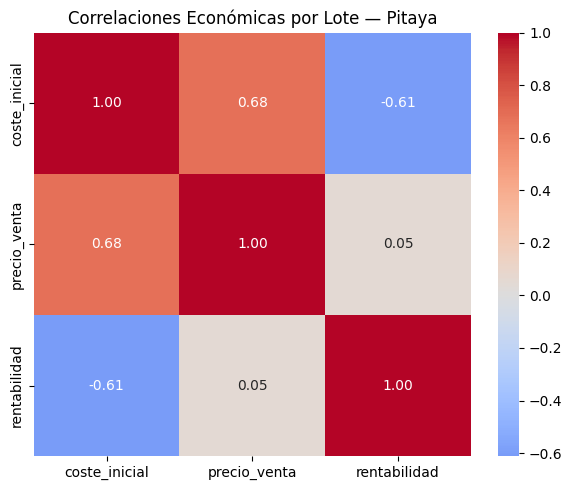

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Pitaya')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.681436  0.027565
coste_inicial      0.681436       1.000000  0.001027
peso               0.027565       0.001027  1.000000


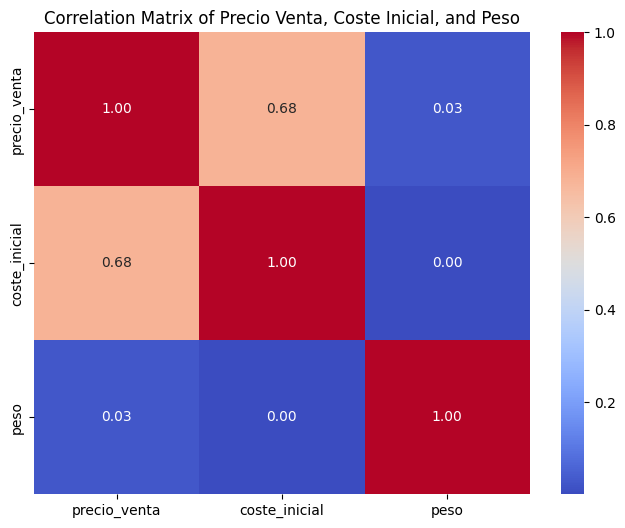

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.68 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso.
Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor.
Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las pitayas y pasamos a analizar la siguiente fruta.